In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets.samples_generator import make_blobs, make_circles, make_moons, make_classification
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

%matplotlib inline

c:\program files\python\python38\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


# Test

In [73]:
np.random.seed(1234)
N, D = 100, 2
x = np.random.rand(N, D)
y = np.random.rand(N, 1)

In [74]:
D_in, D_out = x.shape[1], y.shape[1]

In [75]:
model = Sequential()
model.add(Dense(4, input_dim=D_in, activation='relu'))
model.add(Dense(2, input_dim=4, activation='tanh'))
model.add(Dense(3, input_dim=2, activation='sigmoid'))
model.add(Dense(3, input_dim=3, activation='elu'))
model.add(Dense(D_out, activation='linear'))


model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mape'])
print(model.summary())

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_62 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_63 (Dense)             (None, 3)                 9         
_________________________________________________________________
dense_64 (Dense)             (None, 3)                 12        
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 4         
Total params: 47
Trainable params: 47
Non-trainable params: 0
_________________________________________________________________
None


# Simple regression

In [76]:
data = np.loadtxt('simple_lr.csv', delimiter=',', skiprows=1)
print(data.shape)

x, y = data[:,0].reshape(-1,1), data[:,1].reshape(-1,1)
print(x.shape, y.shape)

(100, 2)
(100, 1) (100, 1)


In [77]:
minmax = MinMaxScaler(feature_range=(-1, 1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(), x.max())

-1.0 0.9999999999999991


4/4 [==============================] - 0s 999us/step - loss: 26.0968 - mse: 26.0968 - mape: 5.6416
mse=26.096820831298828
MAPE=5.641592025756836


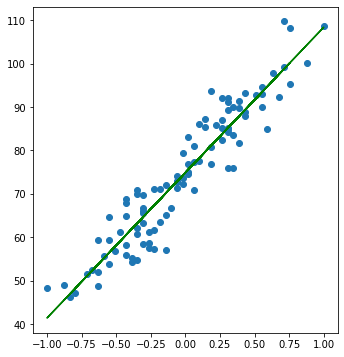

In [78]:
D_in, D_out = x.shape[1], y.shape[1]

model = Sequential()
model.add(Dense(D_out, input_dim=D_in, activation='linear'))
model.add(Dense(D_out, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mape'])
model.fit(x, y, epochs=5000, verbose=0)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x, y)
plt.plot(x, model.predict(x), c='green')

score = model.evaluate(x, y)
print("mse={0}\nMAPE={1}".format(score[1], score[2]))

# Quadratic regression

In [13]:
data = np.loadtxt('quadratic_regression.csv', delimiter=',', skiprows=1)
print(data.shape)

x, y = data[:,0].reshape(-1,1), data[:,1].reshape(-1,1)
print(x.shape, y.shape)

(100, 2)
(100, 1) (100, 1)


In [14]:
minmax = MinMaxScaler(feature_range=(-1, 1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(axis=0), x.max(axis=0))

[-1.] [1.]


4/4 [==============================] - 0s 997us/step - loss: 30.6126 - mse: 30.6126
mse=30.612642288208008


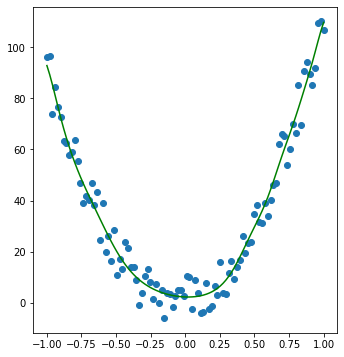

In [19]:
D_in, D_out = x.shape[1], y.shape[1]

model = Sequential()
model.add(Dense(10, input_dim=D_in, activation='tanh'))
model.add(Dense(10, input_dim=10, activation='tanh'))
model.add(Dense(D_out, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
model.fit(x, y, epochs=10000, batch_size=10, verbose=0)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x, y)
plt.plot(x, model.predict(x), c='green')


score = model.evaluate(x, y)
print("mse={0}".format(score[1]))

# Classification

### Helper functions

In [38]:
#Pomocne funkcije za plotanje
def __softmax(x):
	exp = np.exp(x)
	return exp/np.sum(exp, axis=1, keepdims=True)

def __compute_meshgrid(x, y):
	x_min, x_max, y_min, y_max = x[:, 0].min(), x[:, 0].max(), x[:, 1].min(), x[:, 1].max()
	x1, x2 = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
	x_mesh = np.array([x1.ravel(), x2.ravel()]).T
	return x1, x2, x_mesh

def plot_data_and_predictions_3d_in_2d(x, y, is_binary, nn=None, threshold=0.0, figsize=(12,6), s=15, cmap=plt.cm.viridis):
	plt.figure(figsize=figsize)
	ax = plt.subplot(1, 2, 1)
	plt.scatter(x[:,0], x[:,1], c=list(np.array(y).ravel()), s=s, cmap=cmap)

	if nn is not None:
		plt.subplot(1, 2, 2, sharex=ax, sharey=ax)

		x1, x2, x_mesh = __compute_meshgrid(x, y)
		y_mesh = nn.predict(x_mesh)
		y_mesh = np.where(y_mesh <= threshold, 0, 1) if is_binary else np.argmax(__softmax(y_mesh), axis=1)

		plt.scatter(x[:,0], x[:,1], c=list(np.array(y).ravel()), s=s, cmap=cmap)
		plt.contourf(x1, x2, y_mesh.reshape(x1.shape), cmap=cmap, alpha=0.5)

# 2 clusters

In [50]:
x, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=1234)
y = y.reshape(-1, 1)

print(x.shape, y.shape)

(100, 2) (100, 1)


Accuracy: 100.00%


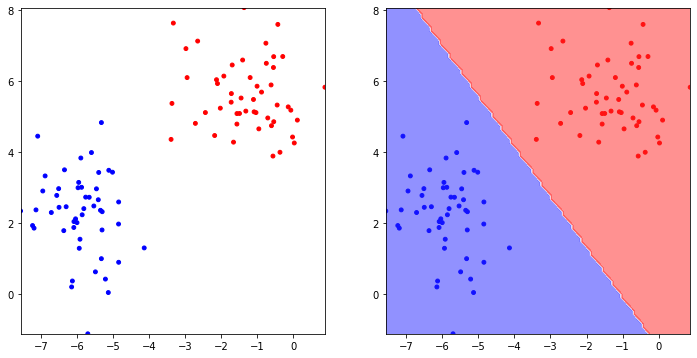

In [44]:
D_in, D_out = x.shape[1], y.shape[1]


#Create model
model = Sequential()
model.add(Dense(10, input_dim=D_in, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

         
#Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
          
#Fit model
model.fit(x, y, epochs=5000, verbose=0)

#Predict class using model
y_pred = model.predict(x)

#Accuracy and plot
print('Accuracy: {:.2f}%'.format(100*accuracy_score(y, y_pred >= 0.5)))
plot_data_and_predictions_3d_in_2d(x, y, is_binary=True, nn=model, threshold=0.5, cmap='bwr')

# 4 clusters

In [41]:
x, y = make_blobs(n_samples=500, n_features=2, cluster_std=0.9, centers=[(-3, -3), (3, 3), (-3, 3), (3, -3)], random_state=1234)
y = y.reshape(-1, 1)
y = np.where(y >= 2, 1, 0)

print(x.shape, y.shape)

(500, 2) (500, 1)


Accuracy: 100.00%


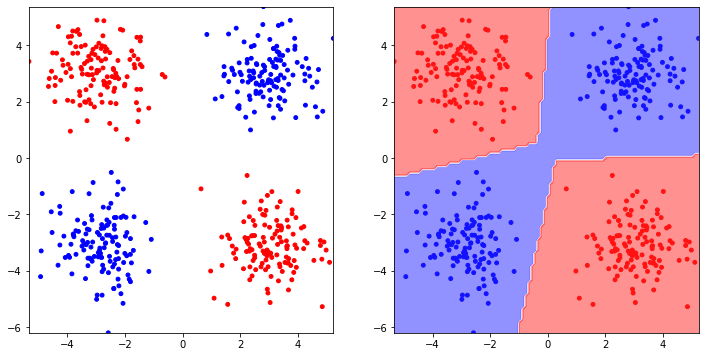

In [42]:
D_in, D_out = x.shape[1], y.shape[1]

#Create model
model = Sequential()
model.add(Dense(10, input_dim=D_in, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

         
#Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
          
#Fit model
model.fit(x, y, epochs=5000, verbose=0)

#Predict class using model
y_pred = model.predict(x)

#Accuracy and plot
print('Accuracy: {:.2f}%'.format(100*accuracy_score(y, y_pred >= 0.5)))
plot_data_and_predictions_3d_in_2d(x, y, is_binary=True, nn=model, threshold=0.5, cmap='bwr')

# Circle clustering

In [48]:
data = np.loadtxt('circle_clustering.csv', delimiter=',', skiprows=1)
print(data.shape)

x, y = data[:,[0,1]], data[:,2].reshape(-1,1)
print(x.shape, y.shape)

(500, 3)
(500, 2) (500, 1)


Accuracy: 100.00%


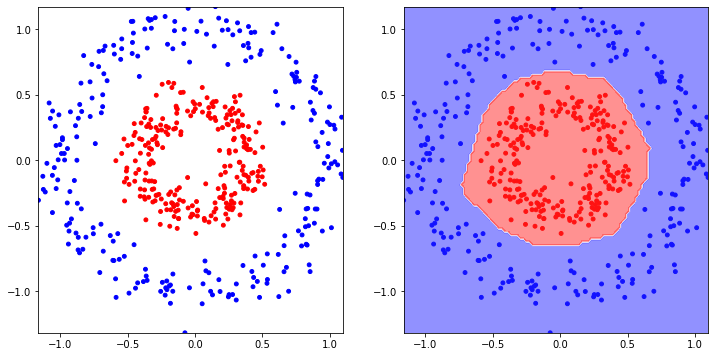

In [49]:
D_in, D_out = x.shape[1], y.shape[1]

#Create model
model = Sequential()
model.add(Dense(8, input_dim=D_in, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

         
#Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
          
#Fit model
model.fit(x, y, epochs=5000, verbose=0)

#Predict class using model
y_pred = model.predict(x)

#Accuracy and plot
print('Accuracy: {:.2f}%'.format(100*accuracy_score(y, y_pred >= 0.5)))
plot_data_and_predictions_3d_in_2d(x, y, is_binary=True, nn=model, threshold=0.5, cmap='bwr')